In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files,drive
uplode= files.upload()


Saving bestsellers with categories.csv to bestsellers with categories.csv


In [2]:
file=pd.read_csv("bestsellers with categories.csv")
filee=pd.DataFrame(file)


In [11]:
print(filee.head()[0:6])
print(filee.shape)
book= filee["Author"].unique()
quantity=len(book)
print(f'Ilość książek: {quantity}')

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
Ilość książek: 248


In [12]:
missing=filee.isnull().sum(axis=1)/ len(filee)

if missing.any():
    print("tak")
else:
    print("Nie")

Nie


In [13]:
unique_value=filee["Genre"].unique()
print(unique_value)

['Non Fiction' 'Fiction']


 Cena minimalna:0
Cena maksymalna: 105
Średnia cena:13.1
Mediana ceny: 11.0


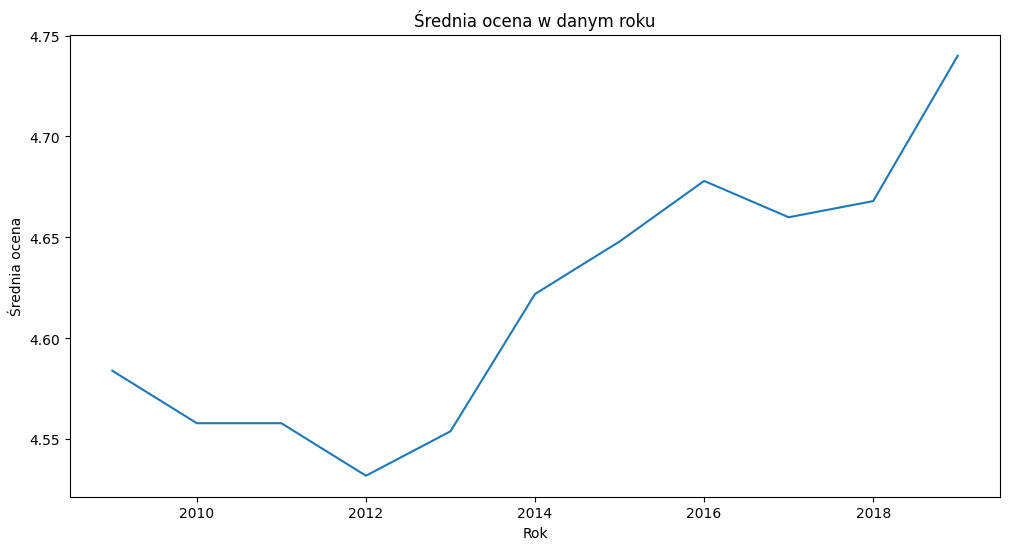

In [95]:

min_price= filee["Price"].min()
max_price=filee["Price"].max()
mean_price=filee["Price"].mean()
median_price=filee["Price"].median()
print(f' Cena minimalna:{min_price}')
print(f"Cena maksymalna: {max_price}")
print(f'Średnia cena:{mean_price}')
print(f'Mediana ceny: {median_price}')
tym=filee.groupby('Year')['User Rating'].mean().reset_index()
x=tym['Year']
y=tym['User Rating']

plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.xlabel('Rok')
plt.ylabel('Średnia ocena')
plt.title('Średnia ocena w danym roku')
plt.show()

In [25]:
max_rating=filee["User Rating"].max()
book_with_rating= filee[filee["User Rating"]==max_rating]
number_of_book=book_with_rating.shape[0]
max=filee.loc[file["Reviews"].idxmax()]
print(f'Najwysz ocena: {max_rating}')
print(f"Liczba książek z maksymalną oceną: {number_of_book}")
print("Książka z największą liczbą recenzj")
print(max)

Najwysz ocena: 4.9
Liczba książek z maksymalną oceną: 52
Książka z największą liczbą recenzj
Name           Where the Crawdads Sing
Author                     Delia Owens
User Rating                        4.8
Reviews                          87841
Price                               15
Year                              2019
Genre                          Fiction
Name: 534, dtype: object


In [54]:
top_50=filee[filee['Year']==2015]

tp=top_50.loc[top_50['Price'].idxmax()]

fikcion=filee[(filee["Year"]==2010) & (filee["Genre"]=="Fiction")].shape[0]
top_4=filee[(filee['User Rating']=="4.9")& (filee["Year"].isin([2010,2011]))].shape[0]
boo=top_50[top_50["Price"]<8].sort_values(by="Price")
print(f"Najdrosz ksiąszka z top50 z roku 2015: {tp['Name']}")
print(f"Ksiąszki z gatunku ficion które znalazły się w top 50 w roku 2010: {fikcion}")
print(f"Liczba książek z oceną 4.9 w roku 2010 i 2011: {top_4}")
print(boo)
print(f"Ostatnia ksiąszka na liście z rankingu z 2015r: {boo.iloc[-1]['Name']}")





Najdrosz ksiąszka z top50 z roku 2015: Publication Manual of the American Psychological Association, 6th Edition
Ksiąszki z gatunku ficion które znalazły się w top 50 w roku 2010: 20
Liczba książek z oceną 4.9 w roku 2010 i 2011: 0
                                                  Name              Author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Er

In [63]:
fikcjon=file[file["Genre"]=="Fiction"]
max_cena=fikcjon["Price"].max()
fikcjon[fikcjon['Price']==max_cena]
min_price=fikcjon["Price"].min()
fikcjon[fikcjon["Price"]==min_price]
print(f"Najwysza cena w gatunku ficjon: {max_cena}$")
print(f' Najnisza cena w gatunku ficjon: {min_price}$')

                             Name           Author  User Rating  Reviews  \
473  The Twilight Saga Collection  Stephenie Meyer          4.7     3801   

     Price  Year    Genre  
473     82  2009  Fiction  
Najwysza cena w gatunku ficjon: 82$
 Najnisza cena w gatunku ficjon: 0$


In [64]:
non_fiction=filee[filee["Genre"]=="Non Fiction"]
max_non=non_fiction["Price"].max()
min_non=non_fiction["Price"].min()
non_fiction[non_fiction["Price"]==max_non]
non_fiction[non_fiction["Price"]==min_non]
print(f"Najwysza cena w gatunku Non Fiction: {max_non}$")
print(f"Najnisza cena w gatunku Non Fiction: {min_non}")

Najwysza cena w gatunku Non Fiction: 105$
Najnisza cena w gatunku Non Fiction: 0


In [71]:
th=filee["Author"]

n_value=pd.concat([th], axis=1)
n_column=n_value.groupby(filee["Author"]).size().reset_index(name="Count")

max_author=n_column.loc[n_column["Count"].idxmax()]


print(f"wymiary nowej tabeli: {n_column.shape}")
print(f"Najwięcej książek ma: {max_author['Author']}")
print(f"{max_author['Author']} napisał: {max_author['Count']} książek")

wymiary nowej tabeli: (248, 2)
Najwięcej książek ma: Jeff Kinney
Jeff Kinney napisał: 12 książek


In [81]:
table=filee.groupby("Author").agg({'User Rating':'mean'}).reset_index()
min_table=table.loc[table['User Rating'].idxmin()]
print(f"Autor o najniszej średniej to: {min_table['Author']} i wynosi: {min_table['User Rating']}")

Autor o najniszej średniej to: Donna Tartt i wynosi: 3.9


In [82]:
ne_tabel=pd.concat([max_author,n_column], axis=1)
sortowane=ne_tabel.sort_values(by="Author")
ferst=sortowane["Author"].head(1)
print(f" Pierwszym autorem na tej liście jest: {ferst}")

 Pierwszym autorem na tej liście jest: 0    Abraham Verghese
Name: Author, dtype: object


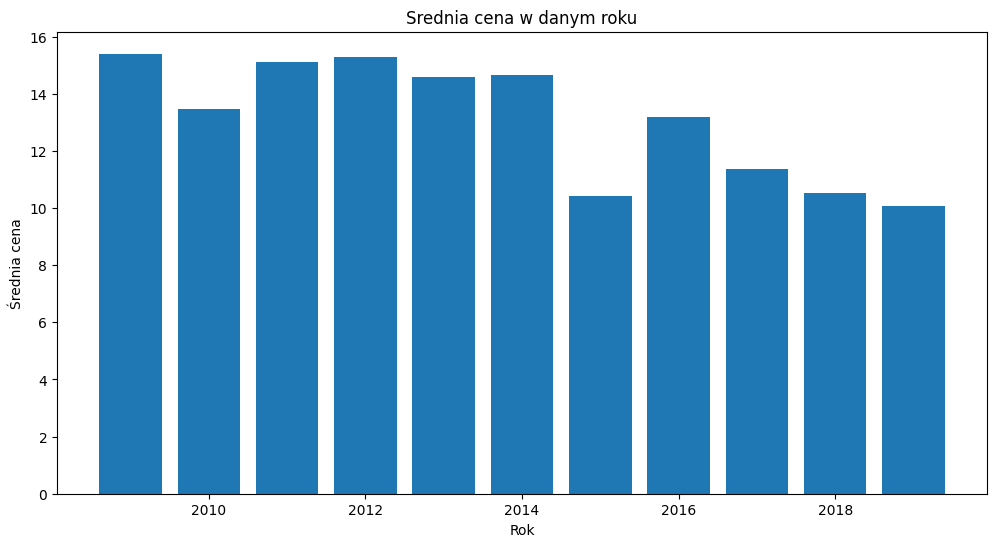

In [99]:
new=filee.groupby('Year')['Price'].mean().reset_index()
x=new['Year']
y=new['Price']
plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.xlabel('Rok')
plt.ylabel('Średnia cena')
plt.title('Srednia cena w danym roku')
plt.show()

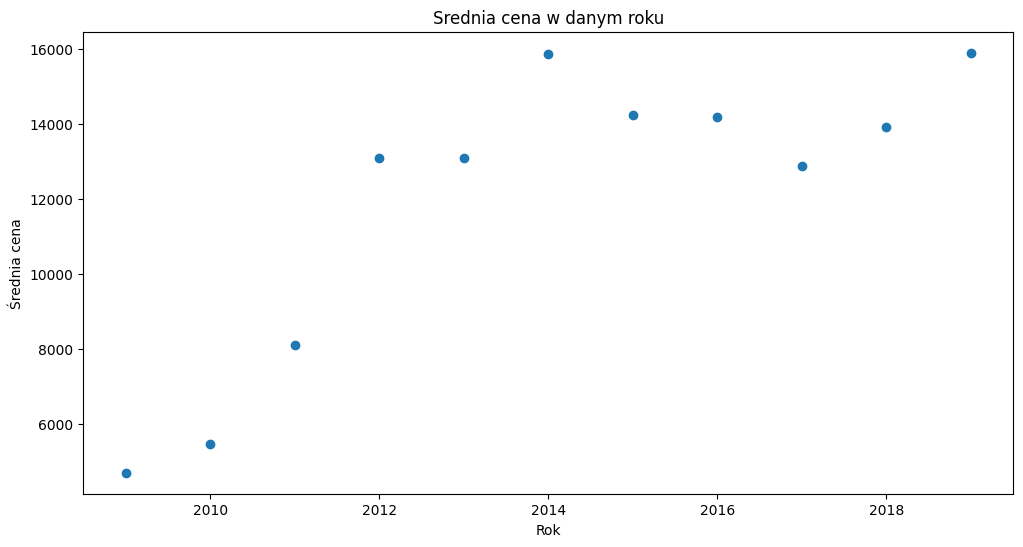

In [110]:
news=filee.groupby('Year')['Reviews'].mean().reset_index()
x=news['Year']
y=news['Reviews']

plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.xlabel('Rok')
plt.ylabel('Średnia cena')
plt.title('Srednia cena w danym roku')
plt.show()